In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [2]:
# In order to generate replicable pseudo-random data a seed is defined 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html

np.random.seed(seed=1)

In [3]:
# A total of n cluster is defined 

total_number_of_clusters = np.random.randint(1, 10)

In [4]:
# Empty arrays to be filled with random data later 

x = []
y = []
z = []

In [5]:
# x and y values for n datapoints are generated for each cluster 

for i in range(total_number_of_clusters):
    points_i = np.random.randint(1, 500, 1)
    x_i = np.random.normal(np.random.randint(-5, 5, 1), np.random.random(), points_i)
    y_i = np.random.normal(np.random.randint(-5, 5, 1), np.random.random(), points_i)
    z_i = np.random.normal(np.random.randint(-5, 5, 1), np.random.random(), points_i)
    x = np.concatenate([x, x_i])
    y = np.concatenate([y, y_i])
    z = np.concatenate([z, z_i])

In [6]:
# x, y and z values are converted into a pandas DataFrame 

df = pd.DataFrame()

df['x'] = x
df['y'] = y
df['z'] = z

In [7]:
df.head()

,x,y,z
0,2.999908,1.181850,0.697079
1,2.999949,2.167705,2.359150
2,2.999874,0.556232,1.833080
3,2.999811,1.691157,2.863974
4,2.999730,2.323939,2.152350


--- 

For details on the visualization see [How to make a 3D scatter plot in Python?](https://stackoverflow.com/questions/1985856/)

---

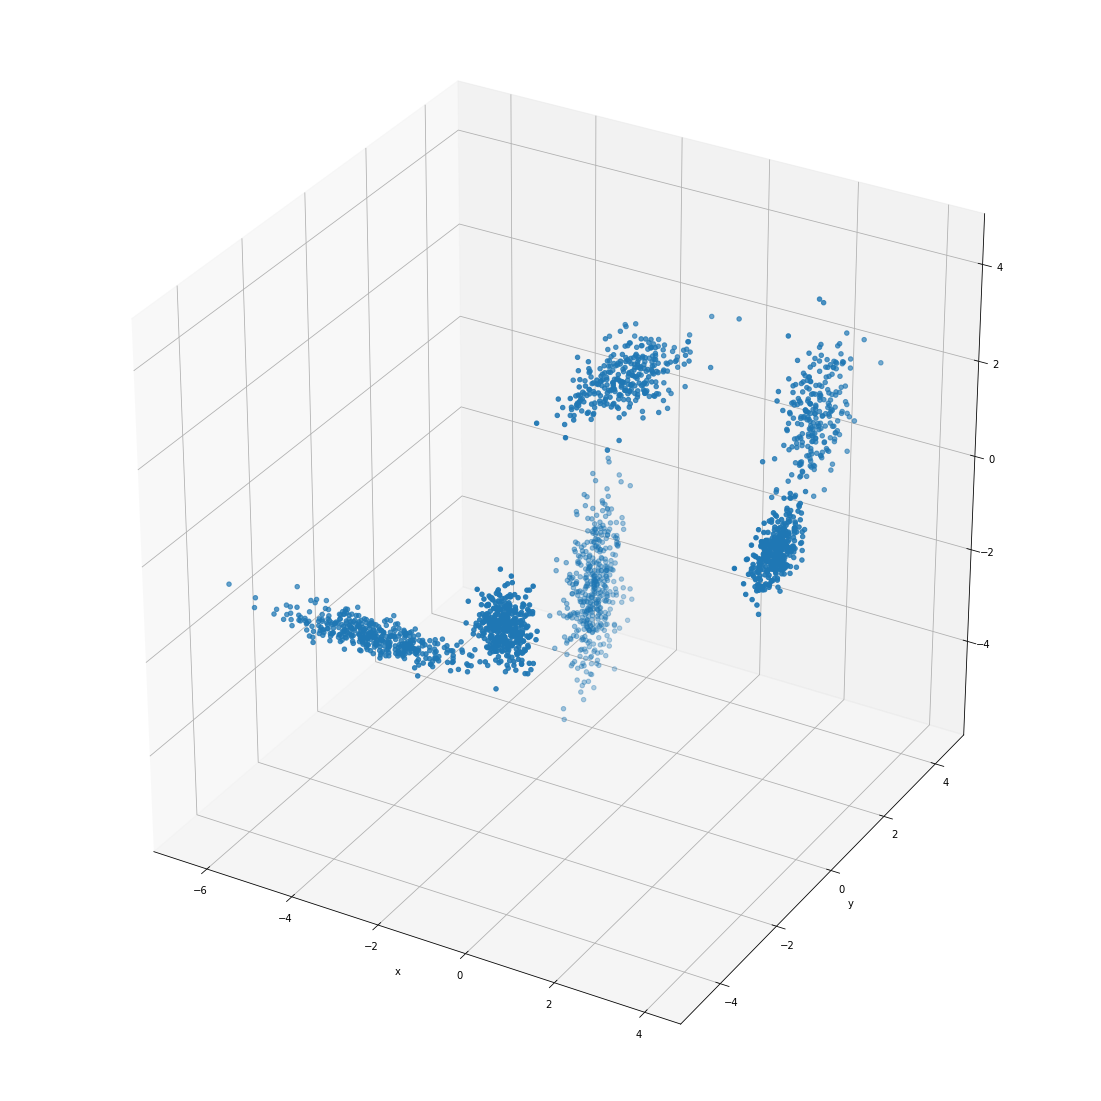

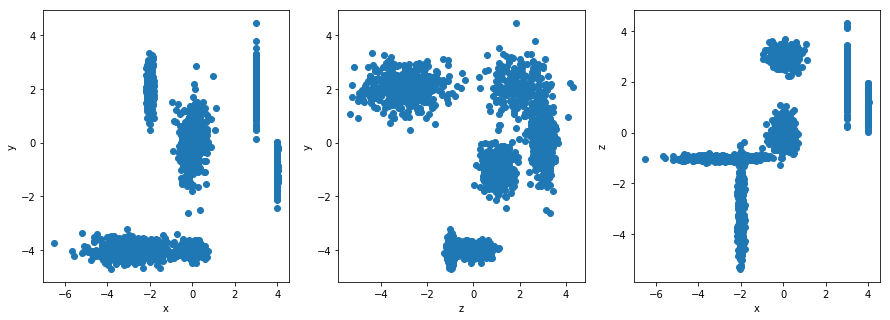

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)

ax.scatter(x, y, z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# for the code see 
# - https://matplotlib.org/gallery/mplot3d/subplot3d.html
# - https://stackoverflow.com/questions/3584805/

# set up a figure thrice as wide as it is tall
fig = plt.figure(figsize=(15, 5))

#  First subplot
ax = fig.add_subplot(1, 3, 1)
plt.scatter(x, y) 
plt.xlabel('x')
plt.ylabel('y')

# Second subplot
ax = fig.add_subplot(1, 3, 2)
plt.scatter(z, y) 
plt.xlabel('z')
plt.ylabel('y')

# Third subplot
ax = fig.add_subplot(1, 3, 3)
plt.scatter(x, z) 
plt.xlabel('x')
plt.ylabel('z')

plt.show()

In [9]:
# Computing clusters 
kmeans = KMeans(n_clusters=6, random_state=0).fit(df)
df['cluster_id'] = kmeans.predict(df)

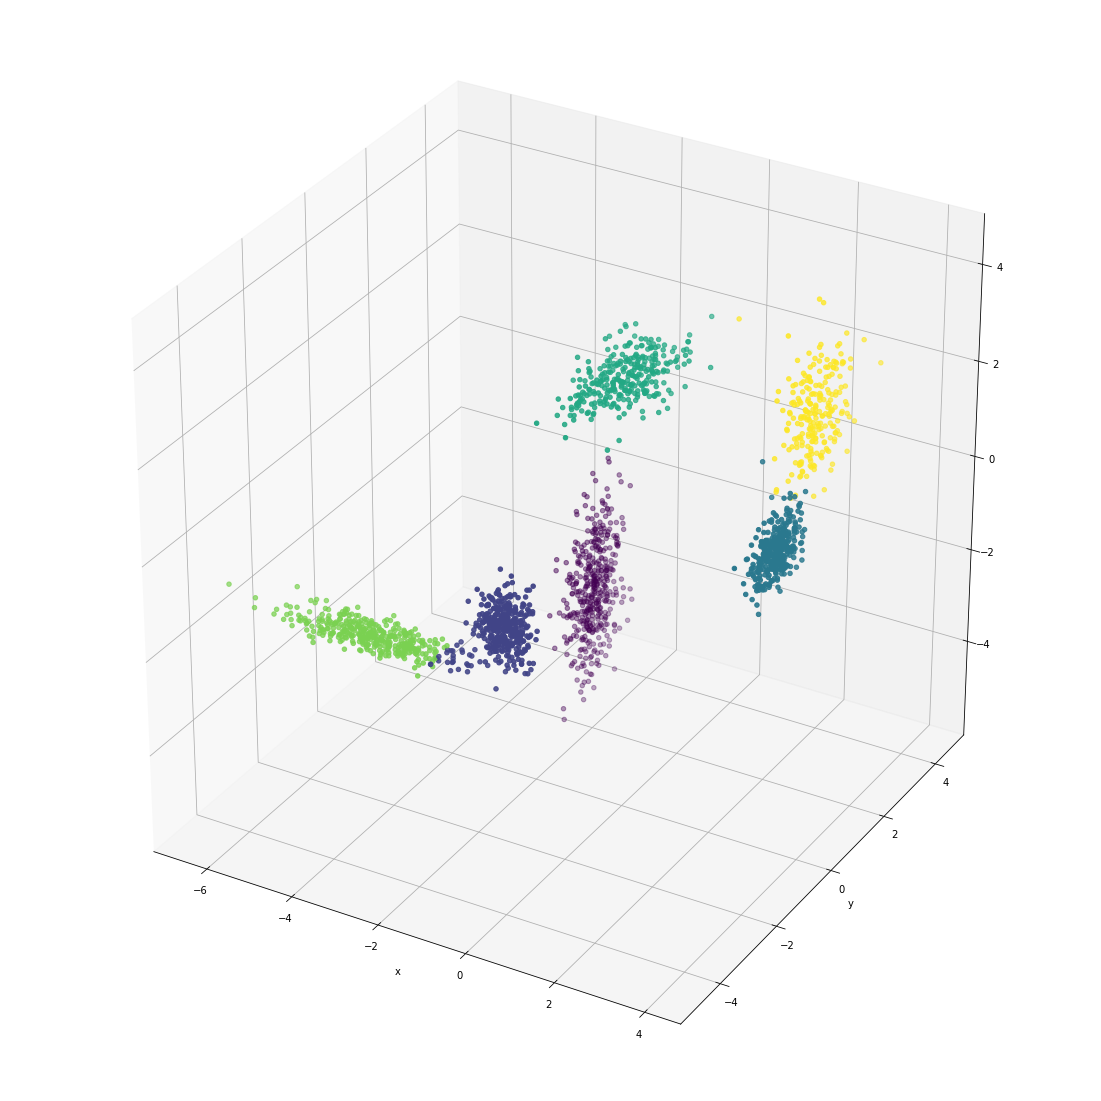

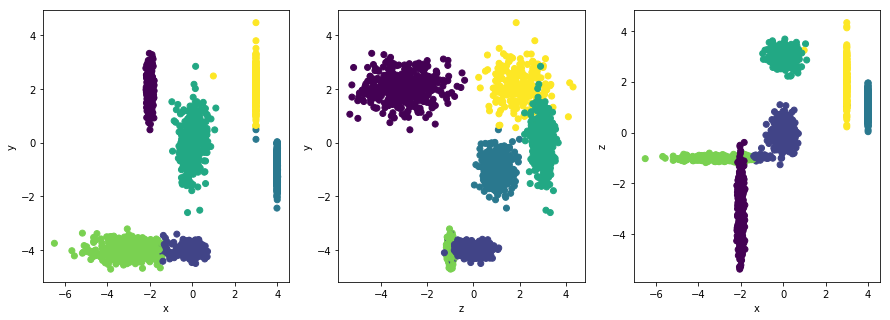

In [10]:
# Plotting data with colorized clusters
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)

ax.scatter(x, y, z, c=df['cluster_id'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# set up a figure thrice as wide as it is tall
fig = plt.figure(figsize=(15, 5))

#  First subplot
ax = fig.add_subplot(1, 3, 1)
plt.scatter(x, y, c=df['cluster_id']) 
plt.xlabel('x')
plt.ylabel('y')

# Second subplot
ax = fig.add_subplot(1, 3, 2)
plt.scatter(z, y, c=df['cluster_id']) 
plt.xlabel('z')
plt.ylabel('y')

# Third subplot
ax = fig.add_subplot(1, 3, 3)
plt.scatter(x, z, c=df['cluster_id']) 
plt.xlabel('x')
plt.ylabel('z')

plt.show()